In [1]:
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path

In [2]:
Path("./pt_spectrum/").mkdir()

In [4]:
mcfile_path = "/global/cfs/projectdirs/atlas/hrzhao/qgcal/Processed_Samples/dijet_pythia_mc16ADE.root"
mcfile = uproot.open(mcfile_path)

In [6]:
label_ptrange = [500, 600, 800, 1000, 1200, 1500, 2000]
label_leadingtype = ["LeadingJet", "SubJet"]
label_etaregion = ["Forward", "Central"]
label_jettype = ["Gluon", "Quark", "B_Quark", "C_Quark", "Other"]
label_var = ["pt", "eta", "ntrk", "width", "c1", "bdt"]
n_bins_var = [60, 50, 60, 60, 60, 60]


In [23]:
Read_HistMap = {}
Read_HistMap_Error = {}

for i, jettype in enumerate(label_jettype):
    Read_HistMap[jettype] = np.zeros((n_bins_var[0]), dtype=float)
    Read_HistMap_Error[jettype] = np.zeros((n_bins_var[0]), dtype=float)
    for pt in label_ptrange[:-1]:
        for leadingtype in label_leadingtype[0:1]:
            for eta_region in label_etaregion: 
                Read_HistMap[jettype] += mcfile["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}"].to_numpy()[0]
                Read_HistMap_Error[jettype] += mcfile["NoReweighting"][f"{pt}_{leadingtype}_{eta_region}_{jettype}_{label_var[0]}_err"].to_numpy()[0]

In [10]:
MC_jet_types = [*Read_HistMap.keys()]
MC_jet_types.reverse()

In [11]:
MC_jet_types

['Other', 'C_Quark', 'B_Quark', 'Quark', 'Gluon']

In [24]:
total_error = np.zeros(60, dtype=np.float32)
for mc_type in MC_jet_types[1:]:
    total_error += Read_HistMap_Error[mc_type]

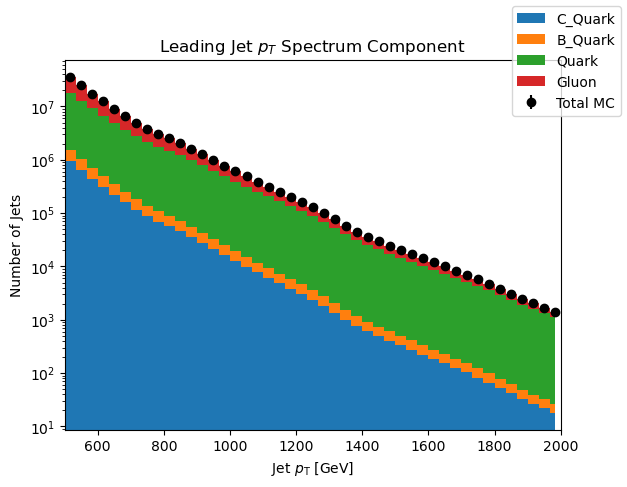

In [36]:
fig, ax = plt.subplots()
custom_bins = np.linspace(0, 2000, 61)
pt_bin_centers = 1/2 * (custom_bins[:-1] + custom_bins[1:])


ax.fill_between(pt_bin_centers, 0, Read_HistMap[MC_jet_types[1]], label=  MC_jet_types[1], step = 'mid')
cum_sum = Read_HistMap[MC_jet_types[1]]
# for i in range(1, len(MC_jet_types) - 1):
for i in range(1, len(MC_jet_types) - 1):
    cum_sum_addone = cum_sum + Read_HistMap[MC_jet_types[i+1]]
    ax.fill_between(pt_bin_centers, cum_sum, cum_sum_addone, label = MC_jet_types[i+1], step='mid')
    cum_sum = cum_sum_addone
# ax.fill_between(pt_bin_centers, Read_HistMap, data=["C_Quark", "B_Quark", "Gluon", "Quark"], step = 'mid')

# ax.hist(total, bins =custom_bins,  label = 'Total MC')
bin_centers = 1/2 * (custom_bins[1:] + custom_bins[:-1])
ax.errorbar(bin_centers, cum_sum_addone, yerr= np.sqrt(total_error), marker = "o", color = "black", linestyle='', label = "Total MC")

ax.set_yscale('log')
ax.set_xlim(500, 2000)
ax.set_title( 'Leading Jet $p_{T}$ Spectrum Component')
ax.set_xlabel('Jet $p_{\mathrm{T}}$ [GeV]')
ax.set_ylabel('Number of Jets')
fig.legend()
fig.show()

In [30]:
total_error

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.67943824e+08, 8.98590160e+07, 4.96418360e+07, 2.82761680e+07,
       1.64761050e+07, 9.88807400e+06, 6.11877600e+06, 4.01814725e+06,
       2.96580825e+06, 2.34850125e+06, 1.77722938e+06, 1.24202562e+06,
       8.43542875e+05, 5.70811438e+05, 3.89525125e+05, 2.69374312e+05,
       1.88258375e+05, 1.32140062e+05, 9.37402656e+04, 6.65619531e+04,
       4.76120586e+04, 3.38153984e+04, 3.29872930e+04, 1.45788545e+04,
       8.11883447e+03, 4.09263672e+03, 2.05628247e+03, 1.19895264e+03,
       7.49798096e+02, 5.65728577e+02, 3.96961365e+02, 3.00886383e+02,
       2.31935028e+02, 1.75896591e+02, 1.44295502e+02, 1.20754631e+02,
       1.30074890e+02, 5.75418510e+01, 4.02789917e+01, 2.63711643e+01,
      

In [29]:
np.sqrt(total_error)

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.2959314e+04, 9.4793994e+03, 7.0456963e+03, 5.3175342e+03,
       4.0590769e+03, 3.1445308e+03, 2.4736160e+03, 2.0045317e+03,
       1.7221522e+03, 1.5324821e+03, 1.3331277e+03, 1.1144620e+03,
       9.1844592e+02, 7.5552063e+02, 6.2411951e+02, 5.1901282e+02,
       4.3388751e+02, 3.6351074e+02, 3.0617032e+02, 2.5799603e+02,
       2.1820187e+02, 1.8388963e+02, 1.8162404e+02, 1.2074293e+02,
       9.0104576e+01, 6.3973721e+01, 4.5346252e+01, 3.4625896e+01,
       2.7382441e+01, 2.3785049e+01, 1.9923889e+01, 1.7346077e+01,
       1.5229413e+01, 1.3262601e+01, 1.2012306e+01, 1.0988841e+01,
       1.1405038e+01, 7.5856347e+00, 6.3465734e+00, 5.1352863e+00,
       4.0421429e+00, 3.1485226e+00, 2.4873378e+00, 2.0326755e